# Pymaceuticals Inc.
---

### Analysis

- In most of the experiments that used Capomulin, you could see a significant decrease in the tumor volume over a 40 day period. Capomulin also has the most amount of timepoints. When it comes to mean, median, variance, etc., only Ramicane has slightly lower values, though Capomluin still has more timepoints.
- Infubinonal was the only drug with potential outliers, let alone the most potential outliers. This could be an indication of it's effectiveness being inconsistent.
- Mouse weight and tumor volume do seem to have some correlation (when under the Capomulin treatment), given that the correlation is 0.84 which indiciates a strong positive linear relationship

In [226]:
# Dependencies and Setup obtained from the starter document.
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Setting the paths for the data files.
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading and setting the data to get it ready for merging.
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataframe using the Mouse ID as both use mouse ID.
# I tried using the "left_index, right_index", but the data was too different from what was displayed in the starter doc.
# Merging them based on the Mouse ID ended up producing the same results, but if needed, I can try to find a way to merge the data without using the Mouse ID.
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Displaying said dataframe. I believe using the Mouse ID as the basis for the merge led to the difference in how it displays, but that only applies to the non-important information where all that needs top be seen is just data.
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [227]:
# Simple code using .nunique() to find the cases of unique Mouse IDs to find the count.
print(merged_data["Mouse ID"].nunique())

249


In [228]:
# Used .loc to search the rows for the .duplicated date by checking the Mouse IDs and Coorelating Timepoints.
# .unique extracts the unique IDs from the rows
duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicate_mouse_ids)

['g989']


In [229]:
# Simple display(...) to display the data for the duplicate Mouse ID.
display(merged_data.loc[merged_data["Mouse ID"] == duplicate_mouse_ids[0]])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [230]:
# Made a clean dataframe that drops the duplicate Mouse based on its ID.
# The duplicates ID was bound to "duplicate_mouse_ids" in a previous set, so I used that variable within this code to drop them.
# merged_data.loc uses boolean indexing and filters the rows. 
# The second part of the first line, which includes the "!=", creates a boolean mask. It checks the data to see what IDs are not equal to the "duplicate_mouse_ids".
# To note, I noticed once more that the data displayed looks very different from the starter doc, but again, it doesn't effect the data as a whole.
cleaned_data = merged_data.loc[merged_data["Mouse ID"] != duplicate_mouse_ids[0]]
display(cleaned_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [231]:
# Simple printing of the cleaned_data amount of Mouse IDs after the duplicate Mouse ID has been dropped.
print(cleaned_data["Mouse ID"].nunique())

248


# Summary Statistics

In [232]:
# So I accidentally used .agg right off the bat. I ended up changing it though and created this list using the ,groupby and adding them to the dataframe one by one.
# I also changed the columns names for this dataframe as well to make them match the start doc. A simple rename function and using inplace=True to directly change the summary_stats dataframe.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().rename("mean").to_frame()
summary_stats["median"] = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stats["var"] = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stats["std"] = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stats["sem"] = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
column_names = {'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}
summary_stats.rename(columns=column_names, inplace=True)
display(summary_stats)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [233]:
# Since I accidentally used .agg on the previous step, I simply transferred it over here.
# I asked ChatGPT how this code should correctly be written because I kept getting errors. It helped me out a bit and I finished up the .agg code.
summary_stats_agg = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
display(summary_stats_agg)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Observed Mouse Timepoints')

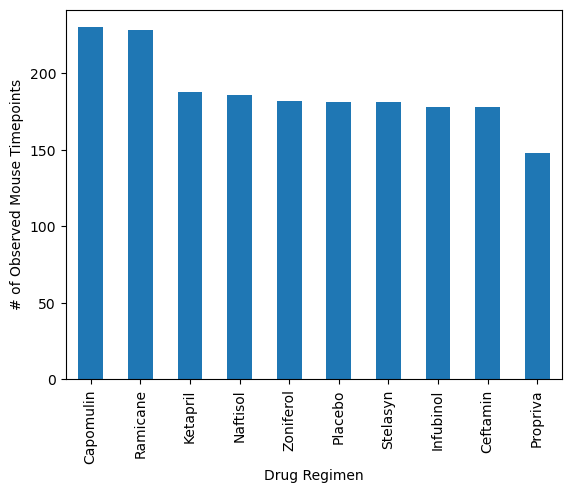

In [234]:
# Simply used what we learned in class on how to make a bar graph, and of course used pandas for it.
# I didn't know if I was supposed to keep using the cleaned_data but the data looks the exact same when displayed, so I left it this way.
# Of course, I set the labels to what was shown in the starter doc using the .set_[]label.
# I have no clue how to remove the text above the bar graph.
# I use .value_counts to the count the unique values and plot the right data.
# You'll see 'title=""' for all of the upcoming graphs, and it's only because I didn't know if that was required to be a part of the plot code.
# Set the kind to "bar".
bar_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind="bar", title="")
bar_pandas.set_xlabel("Drug Regimen")
bar_pandas.set_ylabel("# of Observed Mouse Timepoints")

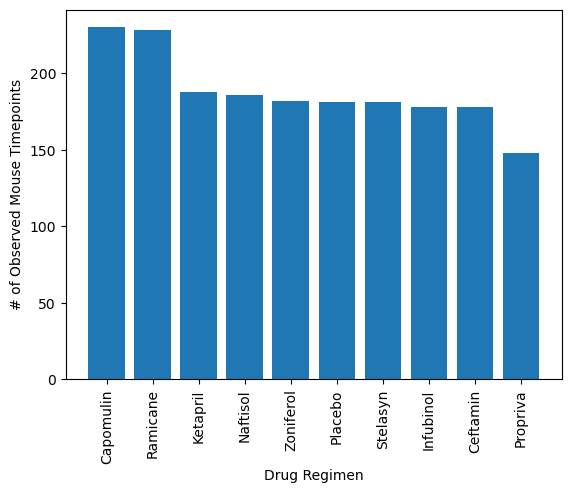

In [235]:
# Used Pyplot as was told in the starter doc and created this graph. I made quite a few errors and had to use ChatGPT to figure them out. 
# Combining .index with .values allows for the data to be displayed correctly.
# .values returns a NumPy array containing the values, but it doesn't include the corresponding rows, which is what the index does.
# Used plt.[]label to alter the labels to what was shown in the starter doc.
# I had to use a code from ChatGPT's suggestion to rotate the drug names because they were horizontal and overlapping.
bar_pyplot = cleaned_data["Drug Regimen"].value_counts()
plt.bar(bar_pyplot.index, bar_pyplot.values)
plt.title("")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Sex')

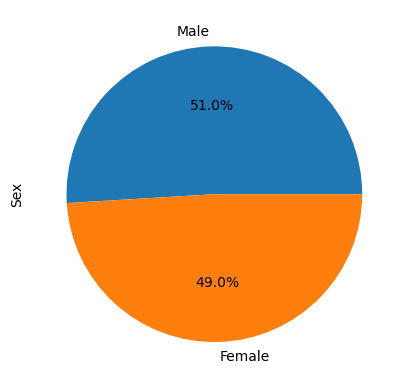

In [236]:
# Used Pandas as was told in the starter doc.
# Super simple code here using .value_counts, using "Sex" for where the data will be coming from, and set the kind to "pie".
# Used ChatGPT to figure out the code for formatting the values displayed, which is the "autopct='%1.1f%%'" part of the code.
# I just figured out what is causing the text to appear, and that's whenever I set the labels. It doesn't mess with the data or break anything, so I'll keep it.
pie_pandas = cleaned_data["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="")
pie_pandas.set_ylabel("Sex")

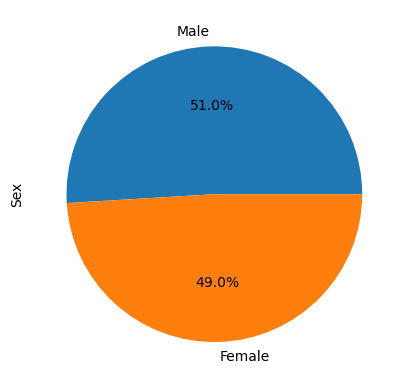

In [237]:
# Used Pyplot as was told in the starter doc
# Set the label again
pie_pyplot = cleaned_data["Sex"].value_counts()
plt.pie(pie_pyplot.values, labels=pie_pyplot.index, autopct='%1.1f%%')
plt.title("")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [238]:
# Created a dictionary that contains the 4 different treatment regimens.
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# This code obtains the last(greatest) timepoint for each mouse using the .groupby and .max functions then resetting the index.
max_timepoint_cd = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merged the original with the new dataframe
final_tumor_volume = pd.merge(max_timepoint_cd, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

In [239]:
# Created the Empty list to fill with tumor volume data.
tumor_volume_data = {treatment: [] for treatment in promising_treatments}

# Claculating the IQR and determining the outliers begins with setting the outlier variable as simply outlier_data.
# The variable is followed up with "for" in which all of the following calculations for determining the potential outliers will be within.
outlier_data = []
for treatment in promising_treatments:
    
    # This code locates the rows which contain mice on each drug and get the tumor volumes.
    # Simple line of code using .loc and == to find the mice and their corresponding treatment and tumor volumes.
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    #
    tumor_volume_data[treatment] = treatment_data
    
    # .quantiles is used to start the process in determining the outliers.
    # This code was used at the suggestion of ChatGPT, as I ran into a bit of a roadblock when trying to remember how to determine the upper and lower limits that could determine an outlier.
    # From what I can understand, 0.25 is the 25th percentile, and 0.75 is the 75th percentile, while 0.5 is the middle.
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])

    # The following code sets the lower and upper limits to code above for determining and outlier.
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]

    # This code calculates the InterQuartile Range by subtracting the upper quartile by the lower quartile, which would equal 0.5, which means the middle 0.5 percentile of the data.
    iqr = upper_quartile - lower_quartile

    # These lines are the final part of defining the lower and upper limits (or bounds) that will identify the outliers.
    # Interesting fact, these lines are based on the Tukeyu's fences approach to identifying outliers within a set of data. Simply put, data that exists outside the bounds are considered potential outliers.
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Simple code used for finding the potential outliers and setting them to a specific variable,
    # "<" is used to find outlying values that fall below the lower_bound of the data, ">" is used to do the opposite, and | is used to separate them.
    potential_outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Decided to change the names in order to make it easier to understand the displayed mess of data, even if it wasn't important in the end.
    outlier_data.append({
        'Treatment': treatment,
        'Lower Quartile': lower_quartile,
        'Upper Quartile': upper_quartile,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Potential Outliers': potential_outliers.values
    })

# I could not for the life of me get the following data to look like how it's displayed in the starter doc. It doesn't effect the results nor the box plot in the following step, but was frustrating to deal with regardless
print("Potential outliers:")
for data in outlier_data:
    print(data)

Potential outliers:
{'Treatment': 'Capomulin', 'Lower Quartile': 32.37735684, 'Upper Quartile': 40.1592203, 'IQR': 7.781863460000004, 'Lower Bound': 20.70456164999999, 'Upper Bound': 51.83201549, 'Potential Outliers': array([], dtype=float64)}
{'Treatment': 'Ramicane', 'Lower Quartile': 31.56046955, 'Upper Quartile': 40.65900627, 'IQR': 9.098536719999998, 'Lower Bound': 17.912664470000003, 'Upper Bound': 54.30681135, 'Potential Outliers': array([], dtype=float64)}
{'Treatment': 'Infubinol', 'Lower Quartile': 54.04860769, 'Upper Quartile': 65.52574285, 'IQR': 11.477135160000003, 'Lower Bound': 36.83290494999999, 'Upper Bound': 82.74144559000001, 'Potential Outliers': array([36.3213458])}
{'Treatment': 'Ceftamin', 'Lower Quartile': 48.72207785, 'Upper Quartile': 64.29983003, 'IQR': 15.577752179999997, 'Lower Bound': 25.355449580000002, 'Upper Bound': 87.66645829999999, 'Potential Outliers': array([], dtype=float64)}


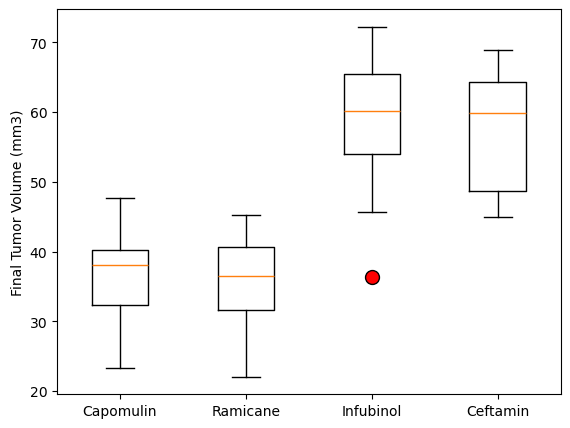

In [240]:
# Simple plt using what was learned in class. Only problem I had here was figuring out the size of the graph that was the same as the one in the starter doc, which is what I figured out to be 6.5,5.
plt.figure(figsize=(6.5,5))

# Using the final_tumor_volume dataframe that was made earlier, I used a similar .loc code with a difference of using "for" and the following line in order to get the specific treatments that were needed for the box plot.
# I decided to follow the starter doc's example for showing the outlier in the data. It makes the most sense given that the circle juxtaposes the general shapes show within the plot (that being boxes).
# The color red works best as it stands out the most and calls attention to it.
boxplot_data = [final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in promising_treatments]
plt.boxplot(boxplot_data, labels=promising_treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.title("")
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

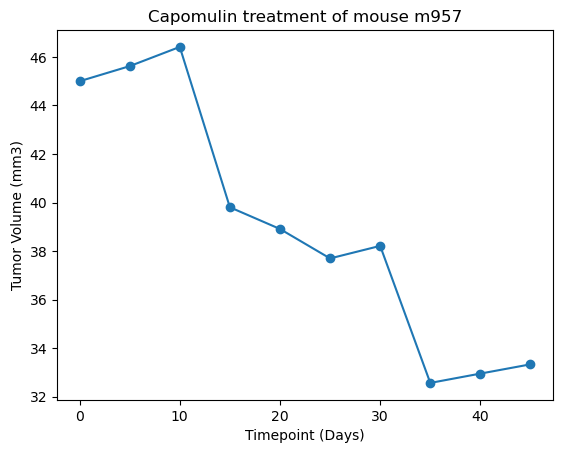

In [241]:
# Set the variable, used .loc to find the Mouse ID, timepoint, and tumor volume that correlate with mice that have their treatment as Capomulin, which was done by using "==".
# This was a neat one for me, using .sample for this part of the homework. I ran it several times, and the mouse was always different, which helped with my analysis.
# As can be seen, I used [0] to retrieve the first value from the data, something we've learned several times to do. This is a part of setting the single_mouse variable.
# I followed that up with using the single_mouse variable in the next line and created another variable.
# The final variable would be used for the plot, as seen below.
# From here going forwards, you'll see plt.grid(Fals). This is to ensure that that there is no grid.
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data.sample()["Mouse ID"].values[0]
single_mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == single_mouse]
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Capomulin treatment of mouse {single_mouse}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(False)
plt.show()

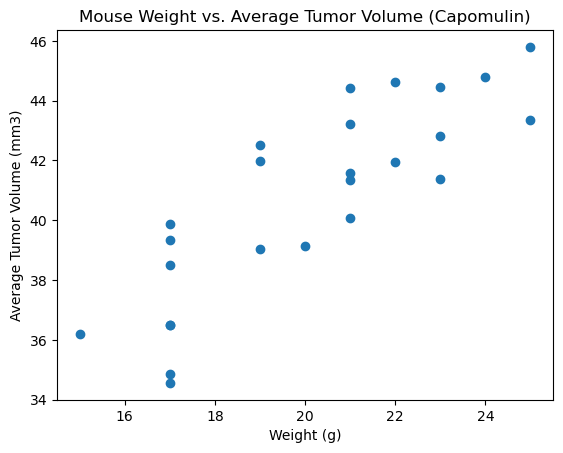

In [242]:
# .groupby and .mean are used here to easily determine the average tumor volume for Capomulin. The same is used for the weight.
# This was pretty easy to write out, so the only hard part was just making sure to match up the plot with the starter doc.
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, avg_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(False)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


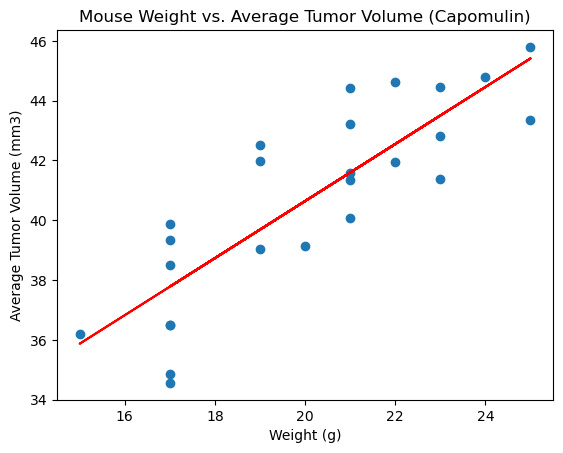

In [243]:
# Got stuck here for a bit trying to write the code out correctly. I used ChatGPT to help me fix my errors and syntax for the code.
# "st.pearsonr" is used to calculate the pearson correltaion coeeficient between the mouse weight and the average tumor volume.
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)

# Simple printing of the same words that are in the document alongside a function that rounds the correlation coefficient.
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# This line performs the linear regression analysis by using the ".linregress" function. The slope, intercept, r-value, p-value, and standard error is what's being calculated.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_volume)

# This line correlates with the regression line, and is based on the data of the linear regression model. It's basically an assumption of prediction of the data.
regress_values = mouse_weight * slope + intercept

# The last of these lines are the simple plt. functions used to make the graph itself and input the values.
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(False)
plt.show()